# Reconstructed quantities

This notebook looks at how accurately we can reconstruct various quantities. To avoid having to run `CAMB` each time we perform a likelihood evaluation, we generate a fiducial cosmology and use this in the reconstruction. Previously we have kept fixed the growth rate and $h$ in our simulations, and in these cases the reconstruction of $H(z)$ and the comoving linear power spectrum is extremely accurate. However now we are considering varying $h$ and the growth, and we need to examine how well this reconstruction works in these cases.

In this notebook we look at how accurately $H(z)$ is reconstructed. For the comoving linear power spectrum, we focus on $\Delta^2_p$, $n_p$ and $\alpha_p$ rather than looking at the full power spectrum, as the full power spectrum is never actually used in the code.

We start off by looking at reconstructions of $H(z)$.

In [1]:
%matplotlib inline
import camb_cosmo
import camb
import recons_cosmo
import fit_linP
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['savefig.dpi'] = 140
mpl.rcParams['figure.dpi'] = 140

In [2]:
cosmo_fid = camb_cosmo.get_cosmology() ## Fiducial cosmology
cosmo_as=camb_cosmo.get_cosmology(As=2.05e-09) ## Cosmology where we change A_s
cosmo_ns=camb_cosmo.get_cosmology(ns=0.92) ## Cosmology where we change n_s
cosmo_h=camb_cosmo.get_cosmology(H0=74.) ## Cosmology where we change H0

## Fit a LinearPowerModel to each cosmology
linP_fid=fit_linP.LinearPowerModel(cosmo=cosmo_fid,k_units="kms")
linP_h=fit_linP.LinearPowerModel(cosmo=cosmo_h,k_units="kms")
linP_as=fit_linP.LinearPowerModel(cosmo=cosmo_as,k_units="kms")
linP_ns=fit_linP.LinearPowerModel(cosmo=cosmo_ns,k_units="kms")

zs=[2.0,3.0,5.0] ## zs we're going to test for the power spectrum reconstructions

In [3]:
## Create a recons_cosmo object
recons=recons_cosmo.ReconstructedCosmology(cosmo_fid=cosmo_fid,zs=zs)

Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)


In [4]:
print('params',linP_fid.get_params().keys())
print('fid',linP_fid.get_params().values())
print('as',linP_as.get_params().values())
print('ns',linP_ns.get_params().values())
print('h',linP_h.get_params().values())

params dict_keys(['f_star', 'g_star', 'Delta2_star', 'n_star', 'alpha_star'])
fid dict_values([0.981369557840318, 0.9677508579459803, 0.36017590528641974, -2.299335667257498, -0.2165270371206895])
as dict_values([0.9813695578403178, 0.9677508579459803, 0.3516002884938845, -2.299335667257498, -0.2165270371205966])
ns dict_values([0.9813695578403178, 0.9677508579459803, 0.32005898207804706, -2.344335667257502, -0.21652703712057947])
h dict_values([0.9757862929001873, 0.9577005905767146, 0.36010576390340354, -2.3004640097099234, -0.2159969715649751])


### Reconstructing $H(z)$
Here we test how accurate $H(z)$ reconstructions are. All I'm doing here is comparing the true $H(z)$ as output by `CAMB` with the reconstructed one, although I'm not sure if degeneracies will play a role here.


In [5]:
print("Fiducial parameters:", linP_fid.get_params())
print("Test cosmology parameters:", linP_h.get_params())

Fiducial parameters: {'f_star': 0.981369557840318, 'g_star': 0.9677508579459803, 'Delta2_star': 0.36017590528641974, 'n_star': -2.299335667257498, 'alpha_star': -0.2165270371206895}
Test cosmology parameters: {'f_star': 0.9757862929001873, 'g_star': 0.9577005905767146, 'Delta2_star': 0.36010576390340354, 'n_star': -2.3004640097099234, 'alpha_star': -0.2159969715649751}


In [6]:
## Test how well H(z) is reconstructed
zs_h=np.linspace(2,5,100).tolist()
results_h = camb.get_results(cosmo_h.set_matter_power(redshifts=zs_h, kmax=2.0)) ## Run CAMB on cosmology with h=0.74
results_fid = camb.get_results(cosmo_fid.set_matter_power(redshifts=zs_h, kmax=2.0)) ## Run CAMB on fid cosmology

true_fid=np.empty(len(zs_h))
true_h=np.empty(len(zs_h))
recons_h=np.empty(len(zs_h))
for aa in range(len(zs_h)):
    true_fid[aa]=results_fid.hubble_parameter(zs_h[aa])
    true_h[aa]=results_h.hubble_parameter(zs_h[aa])
    recons_h[aa]=recons.reconstruct_Hubble(zs_h[aa],linP_h) ## Different h to fiducial cosmology

Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)


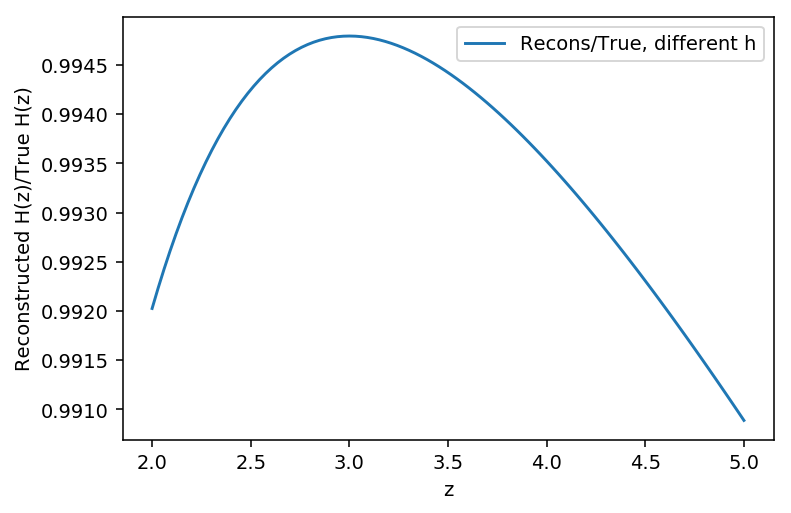

In [7]:
plt.plot(zs_h,recons_h/true_h,label="Recons/True, different h")
plt.xlabel("z")
plt.ylabel("Reconstructed H(z)/True H(z)")
plt.legend()

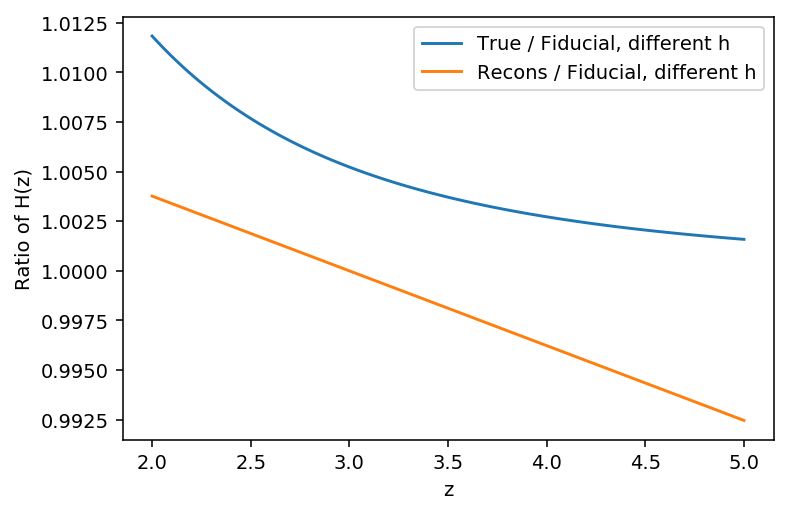

In [8]:
plt.plot(zs_h,true_h/true_fid,label="True / Fiducial, different h")
plt.plot(zs_h,recons_h/true_fid,label="Recons / Fiducial, different h")
plt.xlabel("z")
plt.ylabel("Ratio of H(z)")
plt.legend()

In [9]:
Hz3_fid=results_fid.hubble_parameter(z=3.0)
Hz3_h=results_h.hubble_parameter(z=3.0)
Hz3_recons=recons.reconstruct_Hubble(z=3.0,linP_model=linP_h)
print(Hz3_fid,Hz3_h,Hz3_recons)

306.68497996725597 308.28992350953706 306.68497996725597


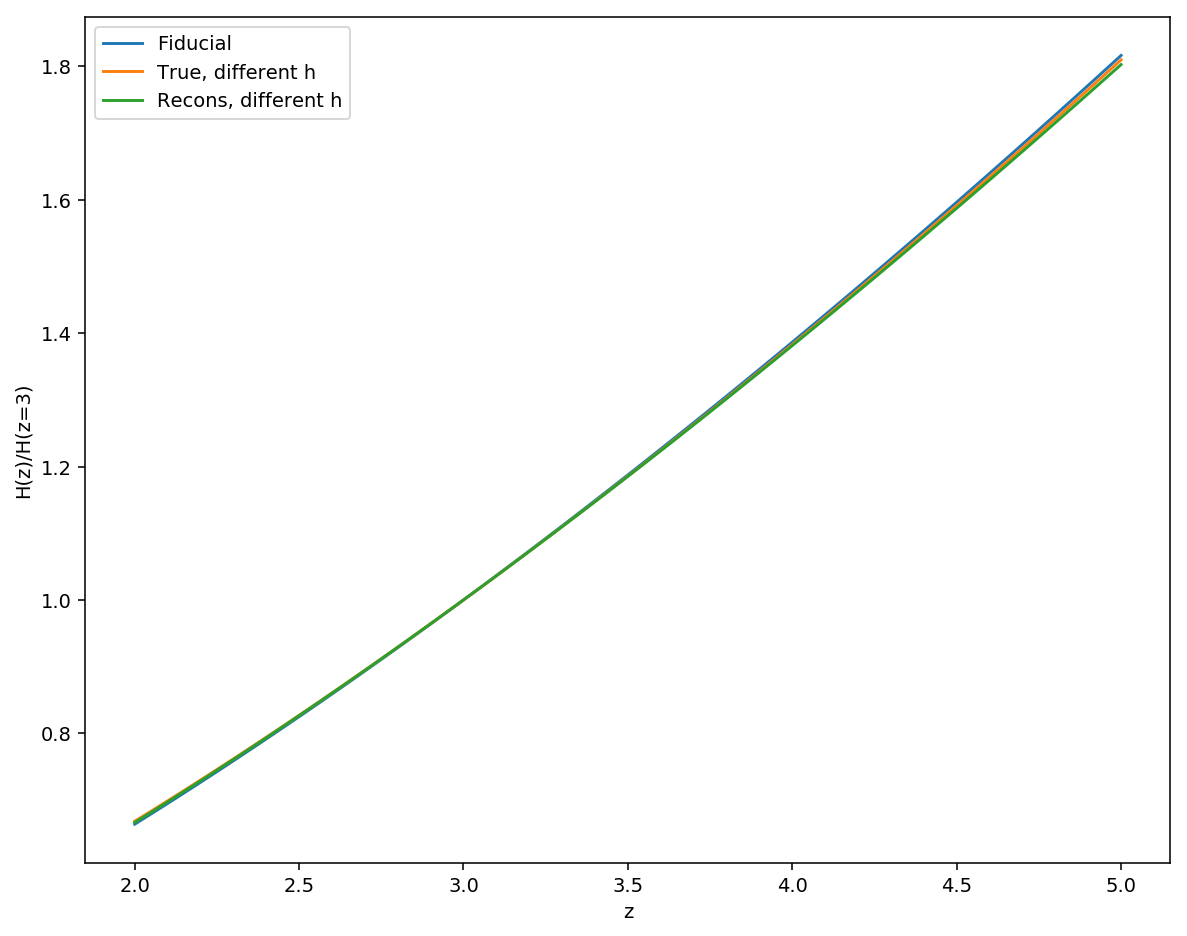

In [10]:
plt.figure(figsize=(10,8))
plt.plot(zs_h,true_fid/Hz3_fid,label="Fiducial")
plt.plot(zs_h,true_h/Hz3_h,label="True, different h")
plt.plot(zs_h,recons_h/Hz3_recons,label="Recons, different h")
plt.xlabel("z")
plt.ylabel("H(z)/H(z=3)")
plt.legend()

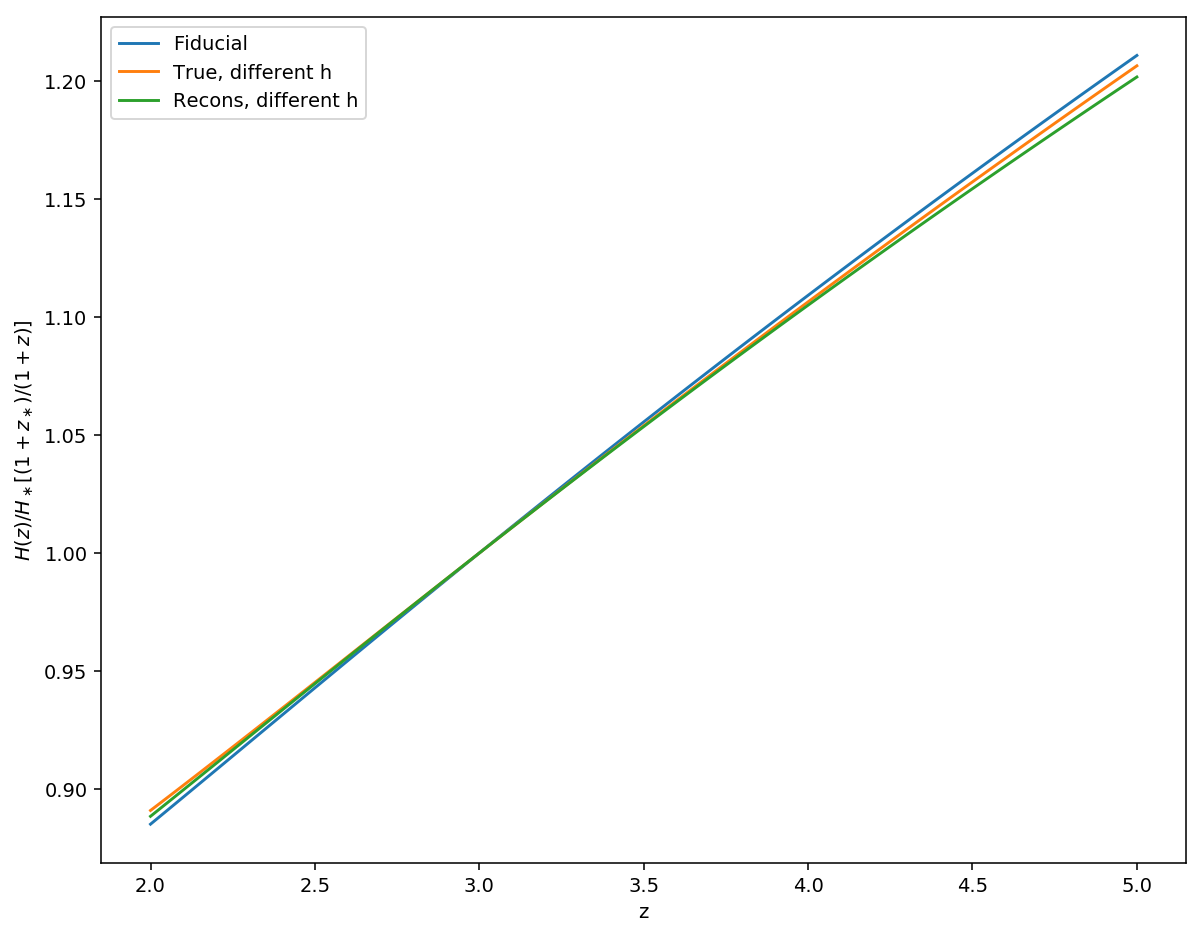

In [11]:
zzz=4.0/(1.0+np.array(zs_h))
plt.figure(figsize=(10,8))
plt.plot(zs_h,true_fid/Hz3_fid*zzz,label="Fiducial")
plt.plot(zs_h,true_h/Hz3_h*zzz,label="True, different h")
plt.plot(zs_h,recons_h/Hz3_recons*zzz,label="Recons, different h")
plt.xlabel("z")
plt.ylabel(r"$H(z)/H_\ast [(1+z_\ast)/(1+z)]$")
plt.legend()

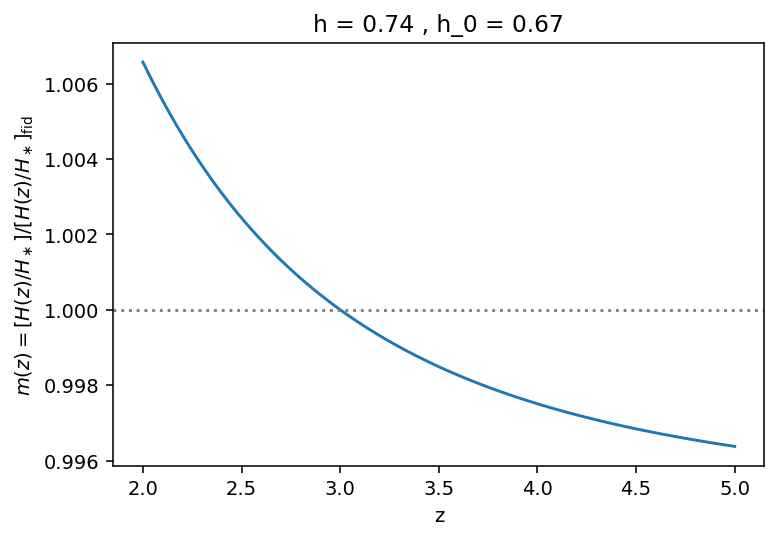

In [12]:
plt.plot(zs_h,(true_h/Hz3_h)/(true_fid/Hz3_fid))
plt.axhline(1.0,ls=':',color='gray')
plt.xlabel("z")
plt.ylabel(r"$m(z) = [H(z)/H_\ast] / [H(z)/H_\ast]_{\rm fid}$")
plt.title('h = {} , h_0 = {}'.format(cosmo_h.h,cosmo_fid.h))
plt.savefig('mz_h0.74.pdf')

Honestly not sure how much we can read into this plot, I don't think I'm thinking about this in the correct way still. For one thing, there are degeneracies in the way the $\Lambda$CDM parameters map into our likelihood parameters so I don't know to what extent this is actually a measure of the accuracy of the reconstruction. Secondly, the two places that $H(z)$ is used is in the converstion of the linear power from velocity units to comoving, and the conversion of the $P_{1D}$ from comoving to velocity units, and its hard to say what the required accuracy there is.

### Reconstructing growth

In [13]:
Om_fid=cosmo_fid.omegam
Om_h=cosmo_h.omegam
print(Om_fid,Om_h)

0.3163288037424815 0.25931336742147554


In [14]:
## Test how well D(z) is reconstructed
D_fid=np.empty(len(zs_h))
D_h=np.empty(len(zs_h))
for aa in range(len(zs_h)):
    z3=(1+zs_h[aa])**3
    Omz_fid=Om_fid*z3/(Om_fid*z3+1-Om_fid)
    Omz_h=Om_h*z3/(Om_h*z3+1-Om_h)
    D_fid[aa]=Omz_fid**0.55
    D_h[aa]=Omz_h**0.55

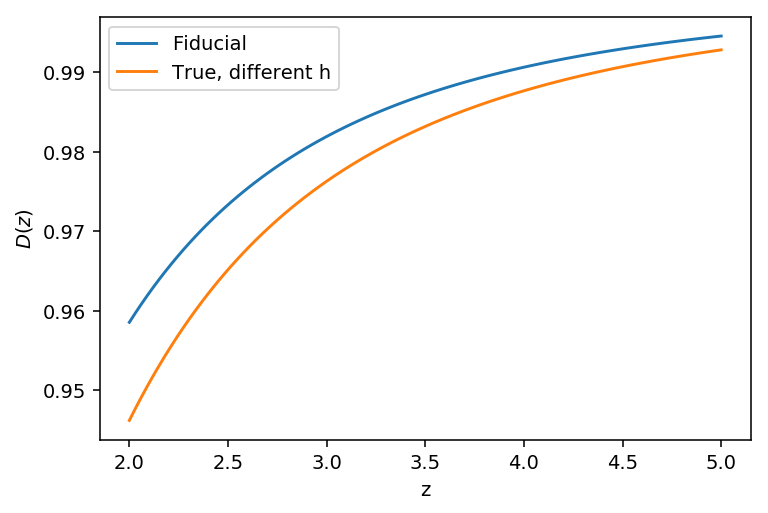

In [15]:
plt.plot(zs_h,D_fid,label="Fiducial")
plt.plot(zs_h,D_h,label="True, different h")
plt.xlabel("z")
plt.ylabel(r"$D(z)$")
plt.legend()

In [16]:
## Compute D(z=3)
z3=(1+3)**3
Om3_fid=Om_fid*z3/(Om_fid*z3+1-Om_fid)
Om3_h=Om_h*z3/(Om_h*z3+1-Om_h)
D3_fid=Om3_fid**0.55
D3_h=Om3_h**0.55
print(D3_fid,D3_h)

0.9818991546121089 0.9762713936438872


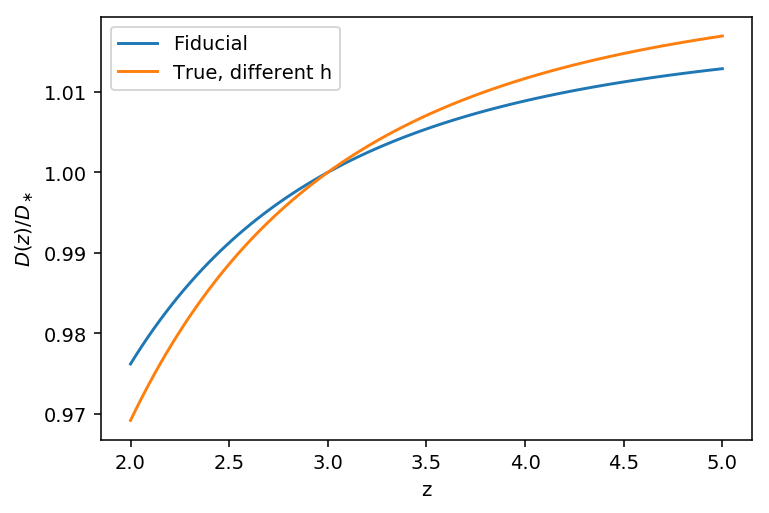

In [17]:
plt.plot(zs_h,D_fid/D3_fid,label="Fiducial")
plt.plot(zs_h,D_h/D3_h,label="True, different h")
plt.xlabel("z")
plt.ylabel(r"$D(z)/D_\ast$")
plt.legend()

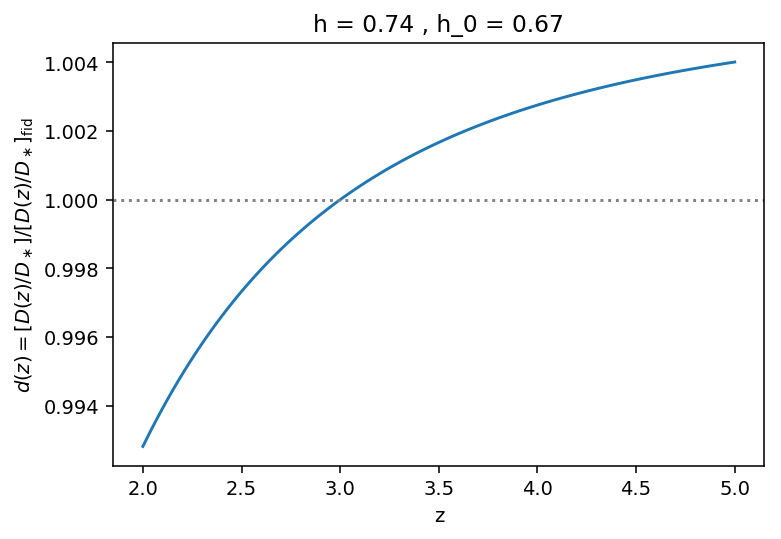

In [18]:
plt.plot(zs_h,D_h/D3_h/(D_fid/D3_fid),label="True / Fiducial")
plt.axhline(1.0,ls=':',color='gray')
plt.xlabel("z")
plt.ylabel(r"$d(z)=[D(z)/D_\ast] / [D(z)/D_\ast]_{\rm fid}$")
plt.title('h = {} , h_0 = {}'.format(cosmo_h.h,cosmo_fid.h))
plt.savefig('dz_h0.74.pdf')

### Compare linear power in velocity units

In [19]:
z=3
k_kms_fid,_,P_kms_fid=camb_cosmo.get_linP_kms(cosmo_fid,zs=[z])
k_kms_h,_,P_kms_h=camb_cosmo.get_linP_kms(cosmo_h,zs=[z])

Text(0, 0.5, 'Q(q)')

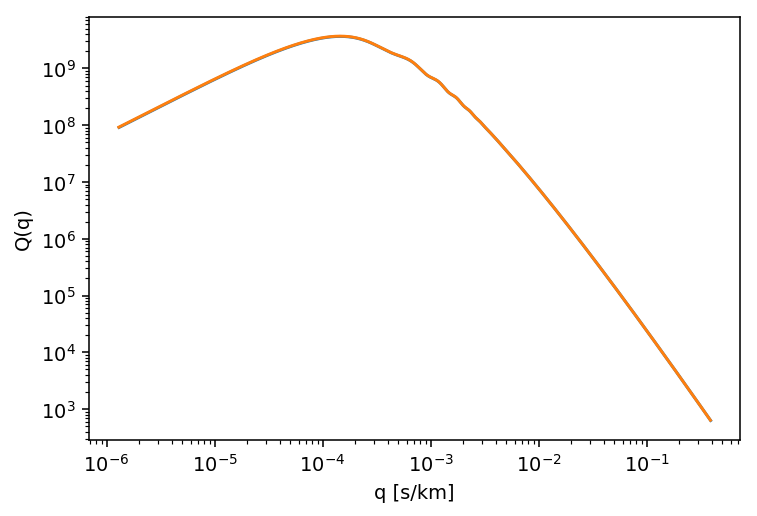

In [20]:
plt.loglog(k_kms_fid[0],P_kms_fid[0])
plt.loglog(k_kms_h[0],P_kms_h[0])
plt.xlabel('q [s/km]')
plt.ylabel('Q(q)')

The power spectra look very similar, and in EdS they would be identical. Let's look at the ratio.

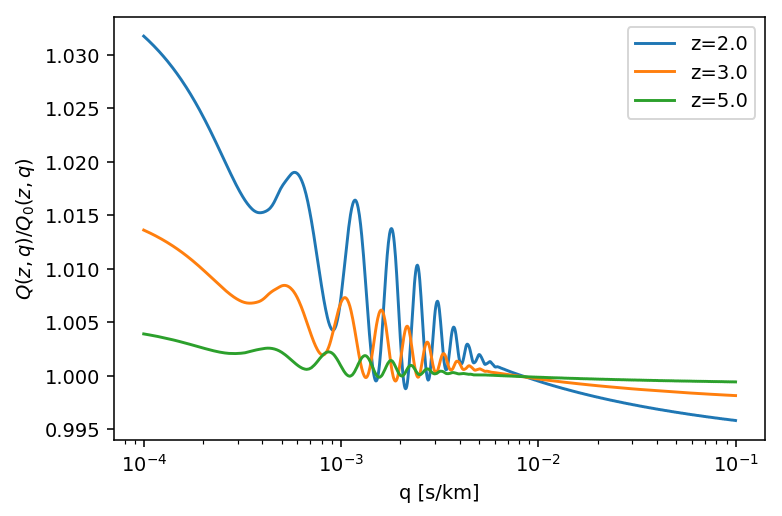

In [21]:
k_kms=np.logspace(-4,-1,1000)
for z in zs:
    k_kms_fid,_,P_kms_fid=camb_cosmo.get_linP_kms(cosmo_fid,zs=[z])
    k_kms_h,_,P_kms_h=camb_cosmo.get_linP_kms(cosmo_h,zs=[z])
    intP_kms_fid=np.interp(k_kms, k_kms_fid[0], P_kms_fid[0]) 
    intP_kms_h=np.interp(k_kms, k_kms_h[0], P_kms_h[0]) 
    plt.semilogx(k_kms,intP_kms_h/intP_kms_fid,label='z={}'.format(z))
plt.xlabel('q [s/km]')
plt.ylabel(r'$Q(z,q)/Q_0(z,q)$')
plt.legend()

### Reconstruct linear power

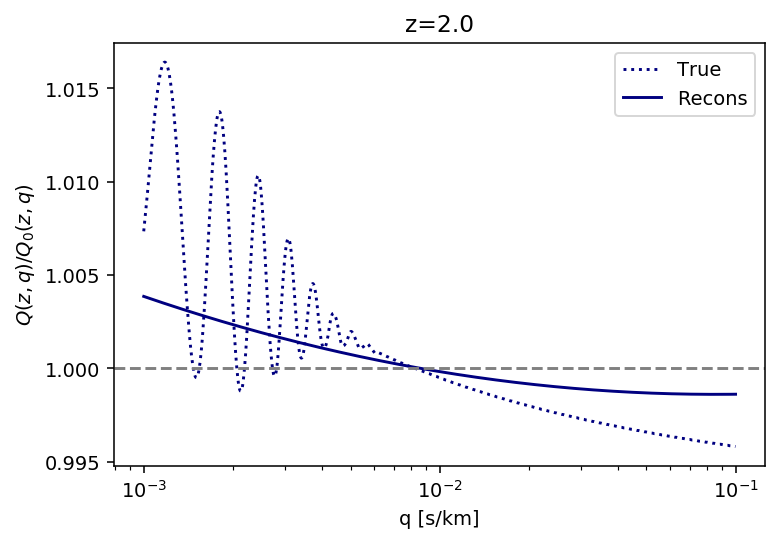

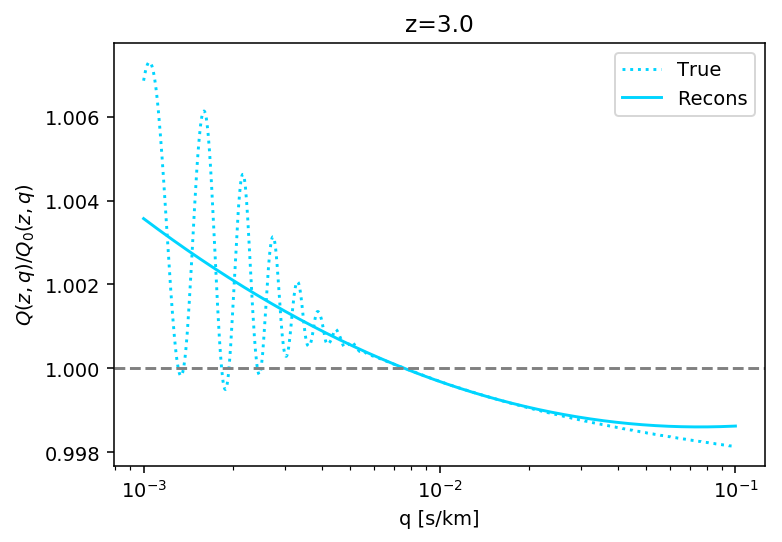

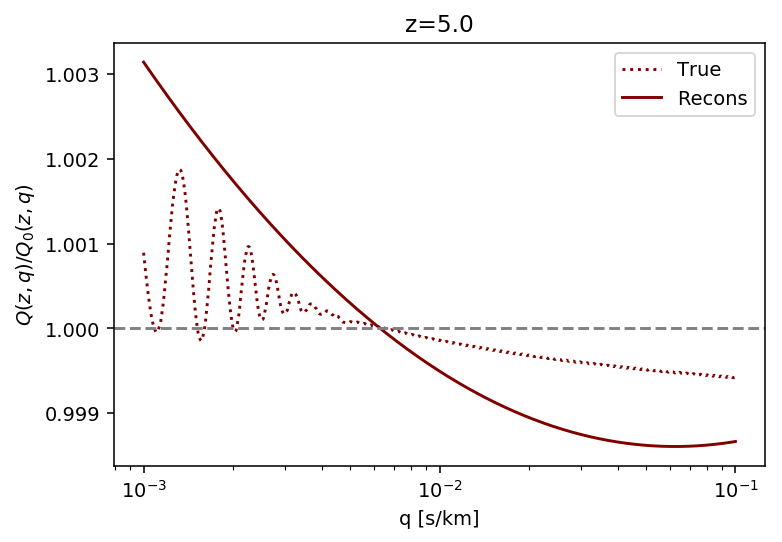

In [22]:
k_kms=np.logspace(-3,-1,1000)
for iz in range(len(zs)):
    z=zs[iz]
    col = plt.cm.jet((z-zs[0])/(zs[-1]-zs[0]))
    recP_kms_h=recons.reconstruct_linP_kms(iz,k_kms,linP_h)
    k_kms_fid,_,P_kms_fid=camb_cosmo.get_linP_kms(cosmo_fid,zs=[z])
    k_kms_h,_,P_kms_h=camb_cosmo.get_linP_kms(cosmo_h,zs=[z])
    intP_kms_fid=np.interp(k_kms, k_kms_fid[0], P_kms_fid[0])
    intP_kms_h=np.interp(k_kms, k_kms_h[0], P_kms_h[0]) 
    plt.semilogx(k_kms,intP_kms_h/intP_kms_fid,':',color=col,label='True')
    plt.semilogx(k_kms,recP_kms_h/intP_kms_fid,'-',color=col,label='Recons')

    plt.axhline(y=1.0,ls='--',color='gray')
    plt.xlabel('q [s/km]')
    plt.ylabel(r'$Q(z,q)/Q_0(z,q)$')
    plt.legend()
    plt.title('z={}'.format(z))
    plt.show()

### now we will cheat and provide true m(z) and d(z)

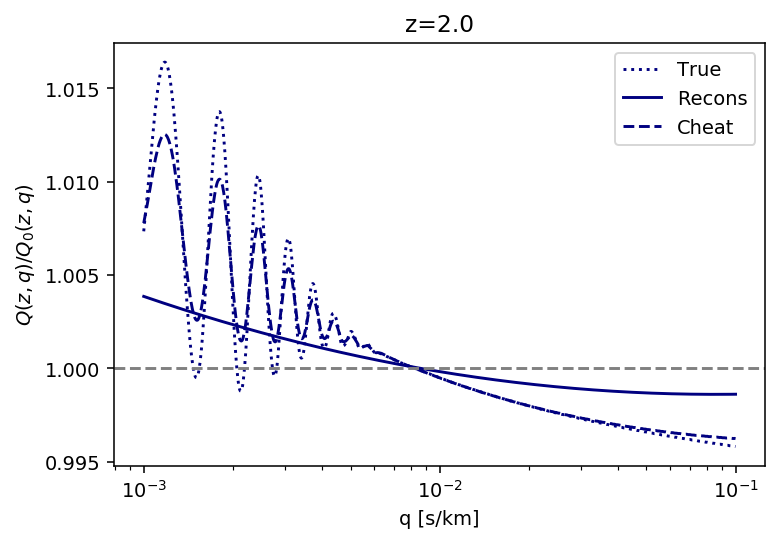

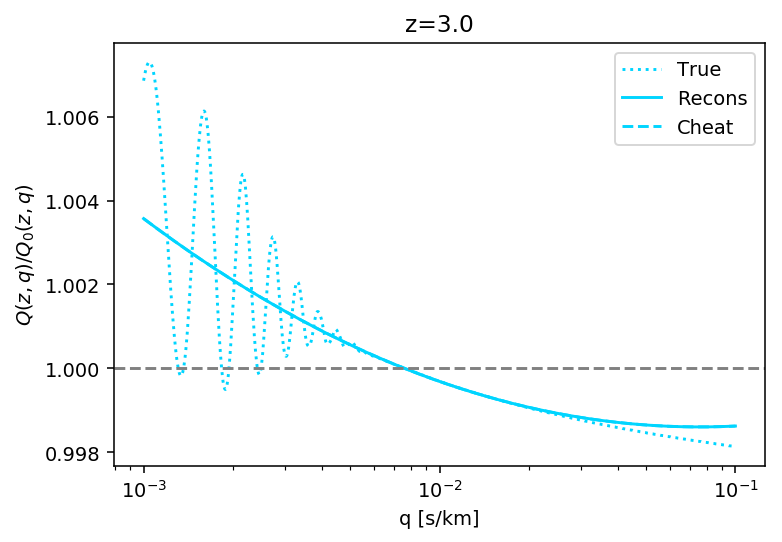

Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)


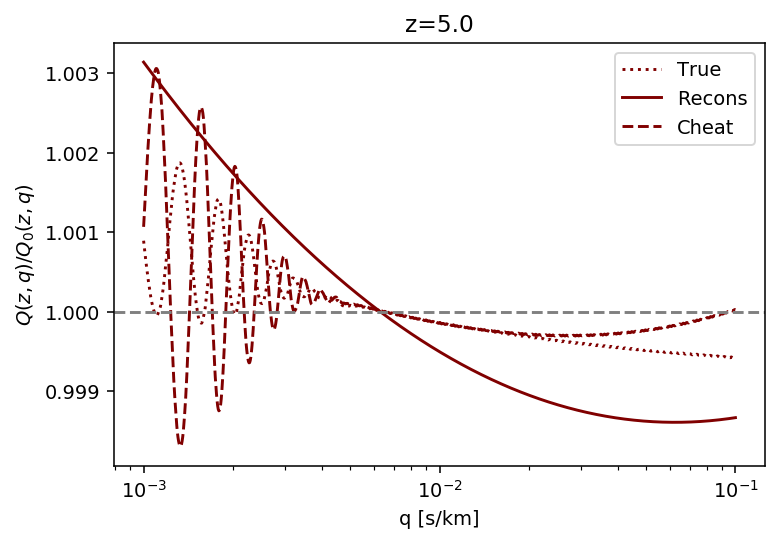

In [23]:
k_kms=np.logspace(-3,-1,1000)
for iz in range(len(zs)):
    plt.figure()
    z=zs[iz]
    col = plt.cm.jet((z-zs[0])/(zs[-1]-zs[0]))
    recP_kms_h=recons.reconstruct_linP_kms(iz,k_kms,linP_h)
    cheP_kms_h=recons.reconstruct_linP_kms(iz,k_kms,linP_h,true_cosmo=cosmo_h)
    k_kms_fid,_,P_kms_fid=camb_cosmo.get_linP_kms(cosmo_fid,zs=[z])
    k_kms_h,_,P_kms_h=camb_cosmo.get_linP_kms(cosmo_h,zs=[z])
    intP_kms_fid=np.interp(k_kms, k_kms_fid[0], P_kms_fid[0]) 
    intP_kms_h=np.interp(k_kms, k_kms_h[0], P_kms_h[0]) 
    plt.semilogx(k_kms,intP_kms_h/intP_kms_fid,':',color=col,label='True')
    plt.semilogx(k_kms,recP_kms_h/intP_kms_fid,'-',color=col,label='Recons')
    plt.semilogx(k_kms,cheP_kms_h/intP_kms_fid,'--',color=col,label='Cheat')

    plt.axhline(y=1.0,ls='--',color='gray')
    plt.xlabel('q [s/km]')
    plt.ylabel(r'$Q(z,q)/Q_0(z,q)$')
    plt.legend()
    plt.title('z={}'.format(z))
    plt.show()